<a href="https://colab.research.google.com/github/shyam007-srec/Sonar-Rock-vs-Mine-Prediction---Machine-Learning-Project/blob/main/Sonar_Rock_vs_Mine_Prediction_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SONAR Rock vs Mine Prediction Project Using Machine Learning

# Objective:
The goal of this project is to build a machine learning model that can classify sonar signals to distinguish between rocks and metal cylinders (mines) based on frequency responses.

# Dataset Overview
**Source:** [Sonar Dataset
](https://drive.google.com/file/d/1pQxtljlNVh0DHYg-Ye7dtpDTlFceHVfa/view)

**Features:** 60 frequency band energy readings (numerical values).

**Target Variable:** Binary classification (Rock or Mine).

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

># Loading and Exploring the Dataset

In [ ]:
# Load the dataset
df=pd.read_csv("/content/Copy of sonar data.csv",header=None)

# Display first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# Check dataset shape
print(f'Sonar DataSet Shape: {df.shape} \n\n{df.shape[0]} Rows \n{df.shape[1]} Columns')

Sonar DataSet Shape: (208, 61) 

208 Rows 
61 Columns


In [ ]:
# Check class distribution
df[60].value_counts()

,count
60,
M,111
R,97


># Observations

**The dataset has 208 samples and 60 features.**

*   The dataset has 208 samples and 60 features.

*   The last column (60) contains labels:

        *    R → Rock
        *    M → Mine







># Data Preprocessing

In [ ]:
#Check the missing values
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


># Separating Features & Target

In [ ]:
X=df.drop(60,axis=1)
y=df[60]

# Convert labels to binary (0: Rock, 1: Mine)
y.map({'R':0,"M":1})

,60
0,0
1,0
2,0
3,0
4,0
...,...
203,1
204,1
205,1
206,1


# Train-Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.1,stratify=y, random_state=42)

In [ ]:
print(f'Shape of X_train{X_train.shape} \nShape of Y_train{y_train.shape}')
print(f'\n\nShape of x_test{X_test.shape} \nShape of y_test{y_test.shape}')

Shape of X_train(187, 60) 
Shape of Y_train(187,)


Shape of x_test(21, 60) 
Shape of y_test(21,)


># Model Building & Evaluation

**Logistic Regression**

In [ ]:
model=LogisticRegression()

model.fit(X_train,y_train)

y_pred_lr = model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print(f'\n\nclassification_report: \n\n{classification_report(y_test, y_pred_lr)}')

Accuracy: 0.8571428571428571


classification_report: 

              precision    recall  f1-score   support

           M       0.83      0.91      0.87        11
           R       0.89      0.80      0.84        10

    accuracy                           0.86        21
   macro avg       0.86      0.85      0.86        21
weighted avg       0.86      0.86      0.86        21



In [ ]:
#Accuracy on Train data
X_train_pred_lr = model.predict(X_train)

print("Test Dataset Accuracy\n\n")
print("Accuracy on test data:", accuracy_score(y_train, X_train_pred_lr))
print(f'\nClassification Report: \n\n{classification_report(y_test,y_pred_dt)}')

Test Dataset Accuracy


Accuracy on test data: 0.8235294117647058

Classification Report: 

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Test Dataset Accuracy\n\n")
print("Accuracy on test data:", accuracy_score(y_test, y_pred_dt))
print(f'\nClassification Report: \n\n{classification_report(y_test,y_pred_dt)}')


Test Dataset Accuracy


Accuracy on test data: 0.7619047619047619

Classification Report: 

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



In [ ]:
#Accuracy on Train data
X_train_pred = model_dt.predict(X_train)

print("Test Dataset Accuracy\n\n")
print("Accuracy on test data:", accuracy_score(y_train, X_train_pred))
print(f'\nClassification Report: \n\n{classification_report(y_test,y_pred_dt)}')

Test Dataset Accuracy


Accuracy on test data: 1.0

Classification Report: 

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_predict = model_rf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,y_predict)}')
print(f'\n\nClassification Report: \n\n{classification_report(y_test,y_predict)}')


Accuracy: 0.9047619047619048


Classification Report: 

              precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



In [ ]:
#Accuracy on Train data
X_train_pred_rf = model_rf.predict(X_train)

print("Test Dataset Accuracy\n\n")
print("Accuracy on test data:", accuracy_score(y_train, X_train_pred_rf))
print(f'\nClassification Report: \n\n{classification_report(y_test,y_pred_dt)}')

Test Dataset Accuracy


Accuracy on test data: 1.0

Classification Report: 

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



# Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC()
model_svc.fit(X_train,y_train)
y_predict_svc = model_svc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,y_predict_svc)}')
print(f'\n\nClassification Report: \n\n{classification_report(y_test,y_predict_svc)}')

Accuracy: 0.9047619047619048


Classification Report: 

              precision    recall  f1-score   support

           M       0.85      1.00      0.92        11
           R       1.00      0.80      0.89        10

    accuracy                           0.90        21
   macro avg       0.92      0.90      0.90        21
weighted avg       0.92      0.90      0.90        21



In [ ]:
#Accuracy on Train data
X_train_pred_svc = model_dt.predict(X_train)

print("Test Dataset Accuracy\n\n")
print("Accuracy on test data:", accuracy_score(y_train, X_train_pred_svc))
print(f'\nClassification Report: \n\n{classification_report(y_test,y_pred_dt)}')

Test Dataset Accuracy


Accuracy on test data: 1.0

Classification Report: 

              precision    recall  f1-score   support

           M       0.71      0.91      0.80        11
           R       0.86      0.60      0.71        10

    accuracy                           0.76        21
   macro avg       0.79      0.75      0.75        21
weighted avg       0.78      0.76      0.76        21



># Model Comparison Table

<div class="table-container">

  <table border="1" class="dataframe">
    <thead>
      <tr style="text-align: center;">
        <th>Model</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1-Score</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Logistic Regression</td>
        <td>0.85</td>
        <td>0.86</td>
        <td>0.85</td>
        <td>0.86</td>
      </tr>
      <tr>
        <td>Decision Tree</td>
        <td>0.71</td>
        <td>0.75</td>
        <td>0.70</td>
        <td>0.70</td>
      </tr>
      <tr>
        <td>Random Forest</td>
        <td>0.90</td>
        <td>0.92</td>
        <td>0.90</td>
        <td>0.90</td>
      </tr>
      <tr>
        <td>SVM</td>
        <td>0.90</td>
        <td>0.92</td>
        <td>0.90</td>
        <td>0.90</td>
      </tr>
    </tbody>
  </table>
  <p><strong>Best Model:</strong> <span style="color: green; font-weight: bold;">Random Forest & SVC</span> (Highest Accuracy & F1-Score)</p>
</div>

># Confusion Matrix Visualization

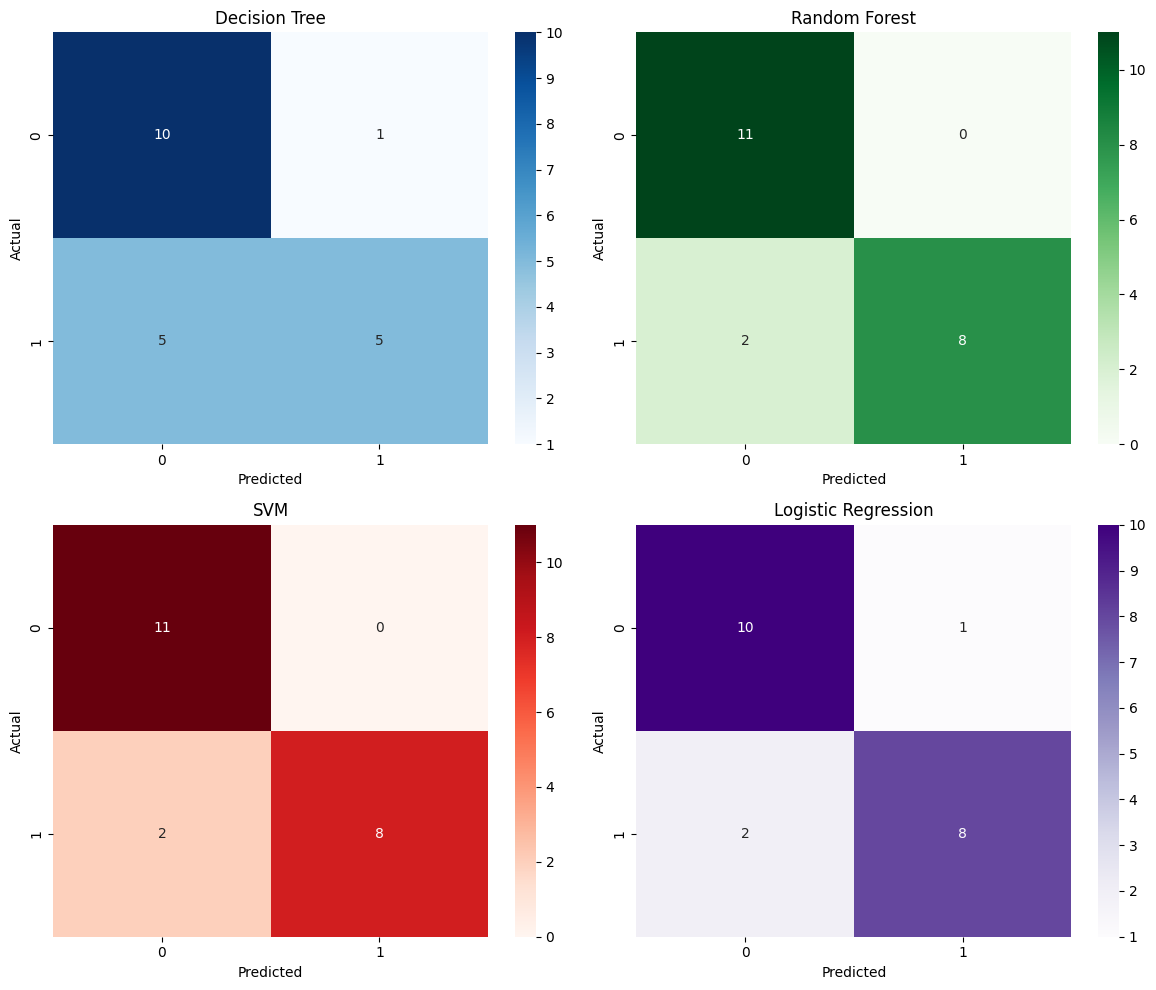

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Assuming you have 4 sets of predictions: y_pred_dt, y_pred_rf, y_pred_svm, y_pred_lr
# Replace these with your actual model predictions

# 1. Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Decision Tree')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_predict)
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[0, 1], cmap='Greens')
axes[0, 1].set_title('Random Forest')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

# 3. SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_predict_svc)
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1, 0], cmap='Reds')
axes[1, 0].set_title('SVM')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# 4. Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', ax=axes[1, 1], cmap='Purples')
axes[1, 1].set_title('Logistic Regression')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

# Adjust layout and display
plt.tight_layout()
plt.show()

># Making a Predicting System

In [ ]:
input_data = (
    0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872,
    0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.0000, 0.8874, 0.8024, 0.7818,
    0.5212, 0.4052, 0.3957, 0.3914, 0.3250, 0.3200, 0.3271, 0.2767, 0.4423, 0.2028,
    0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.1840, 0.1970,
    0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.0530, 0.0742, 0.0409, 0.0061,
    0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.0140, 0.0049, 0.0052, 0.0044
)

# changing the input_data type into array
input_data_array = np.array(data_tuple)

# reshape the np array as we are predicting for one instance
input_data_reshape = input_data_array.reshape(1,-1)

predict_input_data = model_dt.predict(input_data_reshape)

print(predict_input_data)

['M']


In [ ]:
data_tuple = (
    0.1313, 0.2339, 0.3059, 0.4264, 0.4010, 0.1791, 0.1853, 0.0055, 0.1929, 0.2231,
    0.2907, 0.2259, 0.3136, 0.3302, 0.3660, 0.3956, 0.4386, 0.4670, 0.5255, 0.3735,
    0.2243, 0.1973, 0.4337, 0.6532, 0.5070, 0.2796, 0.4163, 0.5950, 0.5242, 0.4178,
    0.3714, 0.2375, 0.0863, 0.1437, 0.2896, 0.4577, 0.3725, 0.3372, 0.3803, 0.4181,
    0.3603, 0.2711, 0.1653, 0.1951, 0.2811, 0.2246, 0.1921, 0.1500, 0.0665, 0.0193,
    0.0156, 0.0362, 0.0210, 0.0154, 0.0180, 0.0013, 0.0106, 0.0127, 0.0178, 0.0231
)
